## Read RGB

In [73]:
from PIL import Image
import numpy as np

img  =  Image.open("pics/1.jpg")
img_np =  np.asarray(img)

In [3]:
img_np.shape

(1500, 1500, 3)

In [74]:
w, h = img.size
compress_rate = 0.05
img_resize = img.resize((100, 100))

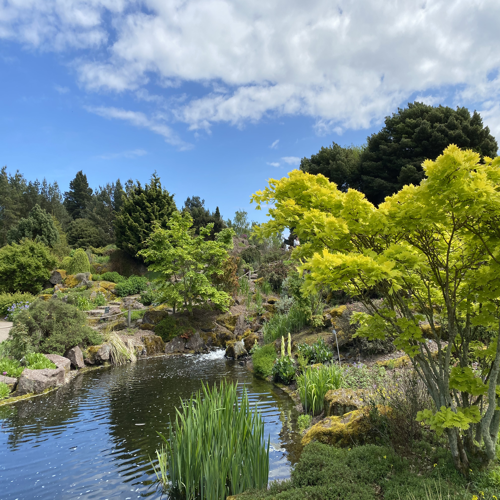

In [96]:
img.resize((500, 500))

In [79]:
img_resize_np =  np.asarray(img_resize)
img_resize_np.shape

(100, 100, 3)

In [6]:
img_np[0][0]

array([249, 243, 217], dtype=uint8)

In [7]:
img_resize_np[0][0]

array([252, 238, 207], dtype=uint8)

## Get DMC info

In [8]:
import pandas as pd
import csv
import re

with open('DMC_RGB.csv','r') as csvfile:
    reader = csv.reader(csvfile)
    rows = [row for row in reader]

In [9]:
pattern = re.compile(r".*<td>(.*?)</td>")
data_all = []
for line in rows:
    content = ''.join(line)
    if re.match(r"(.*)<td>(.*?)</td>", content):
        data = re.search(pattern, content)
        data_all.append(data.group(1))

In [10]:
floss = data_all[::7]
name = data_all[1::7]
Red = data_all[2::7]
Green = data_all[3::7]
Blue = data_all[4::7]
RGB_code = data_all[5::7]
row = data_all[6::7]

In [11]:
dmc_rgb = {"floss": floss,\
"name": name, \
"Red": list(map(int,Red)), \
"Green": list(map(int,Green)), \
"Blue": list(map(int,Blue)), \
"RGB_code": RGB_code, \
"row": row}
dmc_rgb = pd.DataFrame(dmc_rgb)

In [12]:
dmc_rgb.head(10)

,floss,name,Red,Green,Blue,RGB_code,row
0,3713,Salmon Very Light,255,226,226,FFE2E2,row 01-01
1,761,Salmon Light,255,201,201,FFC9C9,row 01-02
2,760,Salmon,245,173,173,F5ADAD,row 01-03
3,3712,Salmon Medium,241,135,135,F18787,row 01-04
4,3328,Salmon Dark,227,109,109,E36D6D,row 01-05
5,347,Salmon Very Dark,191,45,45,BF2D2D,row 01-06
6,353,Peach,254,215,204,FED7CC,row 01-07
7,352,Coral Light,253,156,151,FD9C97,row 01-08
8,351,Coral,233,106,103,E96A67,row 01-09
9,350,Coral Medium,224,72,72,E04848,row 01-10


In [13]:
rgb_matrix = dmc_rgb[["Red","Green","Blue"]]
rgb_matrix

,Red,Green,Blue
0,255,226,226
1,255,201,201
2,245,173,173
3,241,135,135
4,227,109,109
...,...,...,...
449,132,132,132
450,108,108,108
451,86,86,86
452,66,66,66


## Generate palette

In [80]:
col_num = img_resize_np.shape[0]
row_num = img_resize_np.shape[1]
palette_num = rgb_matrix.shape[0]

In [81]:
rgb_count = []
for i in range(palette_num):
    c_i = np.array(rgb_matrix.loc[i])
    n_i = 0
    for row in range(row_num):
        for col in range(col_num):
            x = img_resize_np[row][col]
            dist = np.linalg.norm(x - c_i)
            if dist <= 20:
                n_i += 1
    rgb_count.append(n_i)

In [82]:
rgb_palette = dmc_rgb.copy()
rgb_palette["count"] = rgb_count
rgb_palette

,floss,name,Red,Green,Blue,RGB_code,row,count
0,3713,Salmon Very Light,255,226,226,FFE2E2,row 01-01,0
1,761,Salmon Light,255,201,201,FFC9C9,row 01-02,0
2,760,Salmon,245,173,173,F5ADAD,row 01-03,0
3,3712,Salmon Medium,241,135,135,F18787,row 01-04,0
4,3328,Salmon Dark,227,109,109,E36D6D,row 01-05,0
...,...,...,...,...,...,...,...,...
449,169,Pewter Light,132,132,132,848484,row 19-12,32
450,317,Pewter Gray,108,108,108,6C6C6C,row 19-13,102
451,413,Pewter Gray Dark,86,86,86,565656,row 19-14,213
452,3799,Pewter Gray Vy Dk,66,66,66,424242,row 19-15,346


In [83]:
rgb_sorted = rgb_palette.sort_values(by = ["count"], ascending = False)
rgb_init = rgb_sorted.head(50).reset_index()

In [84]:
rgb_init

,index,floss,name,Red,Green,Blue,RGB_code,row,count
0,233,986,Forest Green Vy Dk,64,82,48,405230,row 10-19,995
1,156,3752,Antique Blue Very Lt,199,209,219,C7D1DB,row 07-17,930
2,121,800,Delft Blue Pale,192,204,222,C0CCDE,row 06-04,920
3,255,936,Avocado Grn V Dk,76,88,38,4C5826,row 11-16,851
4,146,3325,Baby Blue Light,184,210,230,B8D2E6,row 07-07,829
5,256,935,Avocado Green Dk,66,77,33,424D21,row 11-17,814
6,257,934,Avocado Grn Black,49,57,25,313919,row 11-18,783
7,145,3841,Baby Blue Pale,205,223,237,CDDFED,row 07-06,764
8,104,3747,Blue Violet Vy Lt,211,215,237,D3D7ED,row 05-12,757
9,140,159,Blue Gray Light,199,202,215,C7CAD7,row 07-01,749


In [85]:
initial_palette = []
Selected = [0] * 50
initial_palette.append(0)
Selected[0] = 1
initn = rgb_init["count"]
K = 25
Cno = 1

In [38]:
import math as m

In [86]:
def cal_distN(i,palette,rgb_df,initn):
    rgb = rgb_df[["Red","Green","Blue"]]
    colour_palette = np.array(rgb.iloc[palette])
    c_i = np.array(rgb.iloc[i])
    all_dist = list(map(lambda x: np.linalg.norm(x - c_i), colour_palette))
    Dist_i = min(all_dist) ** 2
    distN = Dist_i * m.sqrt(initn[i])
    return distN

In [87]:
while Cno < K:
    not_selected = []
    for i in range(50):
        if Selected[i] == 0:
            not_selected.append(i)
    all_distN = list(map(lambda x: cal_distN(x,initial_palette,rgb_init,initn), not_selected))
    which_max = all_distN.index(max(all_distN))
    j = not_selected[which_max]
    initial_palette.append(j)
    Selected[j] = 1
    Cno += 1

In [88]:
final_palette = rgb_init.iloc[initial_palette].reset_index()

In [89]:
final_palette

,level_0,index,floss,name,Red,Green,Blue,RGB_code,row,count
0,0,233,986,Forest Green Vy Dk,64,82,48,405230,row 10-19,995
1,7,145,3841,Baby Blue Pale,205,223,237,CDDFED,row 07-06,764
2,47,123,799,Delft Blue Medium,116,142,182,748EB6,row 06-06,196
3,44,280,3011,Khaki Green Dk,137,138,88,898A58,row 12-16,215
4,32,130,813,Blue Light,161,194,215,A1C2D7,row 06-13,326
5,12,267,3362,Pine Green Dk,94,107,71,5E6B47,row 12-03,625
6,6,257,934,Avocado Grn Black,49,57,25,313919,row 11-18,783
7,9,140,159,Blue Gray Light,199,202,215,C7CAD7,row 07-01,749
8,33,253,469,Avocado Green,114,132,60,72843C,row 11-14,321
9,39,30,309,Rose Dark,86,74,74,BA4A4A,row 02-08,264


## Find closest colour

In [90]:
img_converted_np = img_resize_np.copy()

In [91]:
np.array(final_palette[["Red","Green","Blue"]])

array([[ 64,  82,  48],
       [205, 223, 237],
       [116, 142, 182],
       [137, 138,  88],
       [161, 194, 215],
       [ 94, 107,  71],
       [ 49,  57,  25],
       [199, 202, 215],
       [114, 132,  60],
       [ 86,  74,  74],
       [ 75,  60,  42],
       [184, 210, 230],
       [230, 232, 232],
       [ 98, 113,  51],
       [110, 101,  92],
       [114, 130,  86],
       [183, 191, 221],
       [ 66,  66,  66],
       [107,  87,  67],
       [136, 141,  51],
       [ 76,  88,  38],
       [ 89,  73,  55],
       [ 66,  77,  33],
       [147, 180, 206],
       [ 98,  93,  80]])

In [92]:
for row in range(row_num):
    for col in range(col_num):
        c = img_resize_np[row][col]
        all_dist = list(map(lambda x: np.linalg.norm(x - c), np.array(final_palette[["Red","Green","Blue"]])))
        which_min = all_dist.index(min(all_dist))
        change = np.array(final_palette[["Red","Green","Blue"]].iloc[which_min])
        img_converted_np[row][col] = change

In [93]:
img_converted_np

array([[[147, 180, 206],
        [147, 180, 206],
        [183, 191, 221],
        ...,
        [205, 223, 237],
        [205, 223, 237],
        [205, 223, 237]],

       [[161, 194, 215],
        [147, 180, 206],
        [161, 194, 215],
        ...,
        [199, 202, 215],
        [199, 202, 215],
        [199, 202, 215]],

       [[184, 210, 230],
        [183, 191, 221],
        [161, 194, 215],
        ...,
        [183, 191, 221],
        [199, 202, 215],
        [199, 202, 215]],

       ...,

       [[116, 142, 182],
        [116, 142, 182],
        [116, 142, 182],
        ...,
        [ 76,  88,  38],
        [ 76,  88,  38],
        [ 76,  88,  38]],

       [[116, 142, 182],
        [116, 142, 182],
        [116, 142, 182],
        ...,
        [ 94, 107,  71],
        [ 94, 107,  71],
        [ 94, 107,  71]],

       [[116, 142, 182],
        [116, 142, 182],
        [116, 142, 182],
        ...,
        [ 94, 107,  71],
        [114, 132,  60],
        [114, 132,  60]]

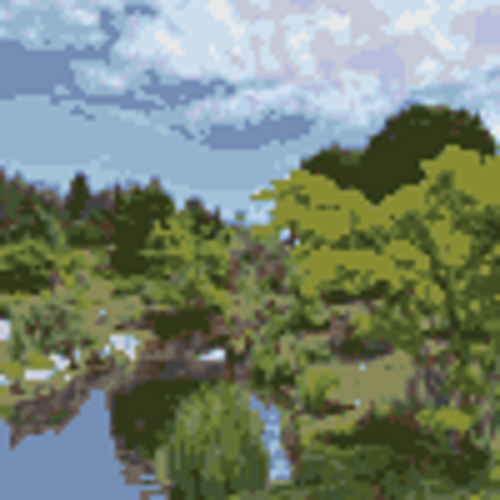

In [95]:
img_converted = Image.fromarray(img_converted_np)
img_converted.resize((500, 500))

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=768076c7-65ce-42d5-b86d-074f9f75d785' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>